In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle

In [2]:
features = pd.read_excel('高温合金数据集.xlsx')
label1 = np.array(features['Ni'])#获取镍元素
label2 = np.array(features['Cr'])#获取铬元素
label3 = np.array(features['Co'])#获取钴元素
label4 = np.array(features['Fe'])#获取铁元素
label5 = np.array(features['Al'])#获取铝元素
label6 = np.array(features['Ti'])#获取钛元素
label7 = np.array(features['Nb'])#获取铌元素
label8 = np.array(features['Mo'])#获取钼元素
label9 = np.array(features['W'])#获取钨元素
label10 = np.array(features['C'])#获取碳元素
label11 = np.array(features['B'])#获取硼元素
label12 = np.array(features['Zr'])#获取锆元素
features= features.drop('Ni', axis = 1)
features= features.drop('Cr', axis = 1)
features= features.drop('Co', axis = 1)
features= features.drop('Fe', axis = 1)
features= features.drop('Al', axis = 1)
features= features.drop('Ti', axis = 1)
features= features.drop('Nb', axis = 1)
features= features.drop('Mo', axis = 1)
features= features.drop('W', axis = 1)
features= features.drop('C', axis = 1)
features= features.drop('B', axis = 1)
features= features.drop('Zr', axis = 1)
features= features.drop('合金的牌号', axis = 1)
features= features.drop('TYS', axis = 1)
features= features.drop('Elong', axis = 1)
features

拉伸温度  固溶处理温度  固溶处理时间  稳定时效温度  稳定时效时间  时效温度  时效时间     UTS
0      20     970     1.0     720       8   620   8.0  1475.0
1      20     970     3.0     720       8   620   8.0  1456.0
2      20     950     1.0     720       8   620   8.0  1455.0
3      20     970     1.0     720       8   620  20.0  1484.0
4     950     960     1.0     720       8   620   8.0   135.0
..    ...     ...     ...     ...     ...   ...   ...     ...
368    20    1155     2.0     845      24   705  20.0  1050.0
369    20    1025     2.0     843      24   704  24.0  1172.0
370    20    1025     2.0     843      24   704  24.0  1048.0
371    20       0     0.0       0       0     0   0.0  1320.0
372    20    1130     1.0     845      24   707  20.0  1150.0

[373 rows x 8 columns]

In [3]:
n_samples, n_features = features.shape
#features = pd.get_dummies(features)
#feature_list = list(features.columns)#获取列名
features = np.array(features)#获取机械性能+热处理工艺+试验条件
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = MinMaxScaler().fit_transform(features)#将进行归一化处理
from sklearn.model_selection import train_test_split
test_ratio = 0.25#按照四比一划分数据集合；3/4的数据用于训练集合，1/4的数据用于验证集合。
SEED = 26 ### the test/train data is checked on this seed, it has similiar distribution to the whole dataset
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features, label2,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features, label3,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features4, test_features4, train_labels4, test_labels4 = train_test_split(features, label4,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features5, test_features5, train_labels5, test_labels5 = train_test_split(features, label5,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features6, test_features6, train_labels6, test_labels6 = train_test_split(features, label6,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features7, test_features7, train_labels7, test_labels7 = train_test_split(features, label7,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features8, test_features8, train_labels8, test_labels8 = train_test_split(features, label8,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features9, test_features9, train_labels9, test_labels9 = train_test_split(features, label9,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features10, test_features10, train_labels10, test_labels10 = train_test_split(features, label10,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features11, test_features11, train_labels11, test_labels11 = train_test_split(features, label11,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)
train_features12, test_features12, train_labels12, test_labels12 = train_test_split(features, label12,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def evaluate(true_labels, pred_labels):
    errors = abs(pred_labels - true_labels)
    MAE = mean_absolute_error(true_labels, pred_labels)
    mape = 100 * np.mean(errors / true_labels)
    r2 = r2_score(true_labels, pred_labels)
    RMSE = mean_squared_error(true_labels, pred_labels,squared=False)
    return mape, MAE, RMSE, r2

In [5]:
from sklearn.linear_model import Ridge  # Import Ridge Regressor
model_seed = 100
from sklearn.ensemble import RandomForestRegressor
#model_rf = RandomForestRegressor(random_state=model_seed)
Model1 = RandomForestRegressor(random_state=model_seed)
Model2 = RandomForestRegressor(random_state=model_seed)
Model3 = RandomForestRegressor(random_state=model_seed)
Model4 = RandomForestRegressor(random_state=model_seed)
Model5 = RandomForestRegressor(random_state=model_seed)
Model6 = RandomForestRegressor(random_state=model_seed)
Model7 = RandomForestRegressor(random_state=model_seed)
Model8 = RandomForestRegressor(random_state=model_seed)
Model9 = RandomForestRegressor(random_state=model_seed)
Model10 = Ridge(alpha=1.0, random_state=100)
Model11 = Ridge(alpha=1.0, random_state=100)
Model12 = Ridge(alpha=1.0, random_state=100)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LeaveOneOut
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
Model1.fit(train_features1, train_labels1)
Model2.fit(train_features2,train_labels2)
Model3.fit(train_features3,train_labels3)
Model4.fit(train_features4, train_labels4)
Model5.fit(train_features5,train_labels5)
Model6.fit(train_features6,train_labels6)
Model7.fit(train_features7, train_labels7)
Model8.fit(train_features8,train_labels8)
Model9.fit(train_features9,train_labels9)
Model10.fit(train_features10, train_labels10)
Model11.fit(train_features11,train_labels11)
Model12.fit(train_features12,train_labels12)

train_predicted_Ni = Model1.predict(train_features1)
test_predicted_Ni = Model1.predict(test_features1)

train_predicted_Cr = Model2.predict(train_features2)
test_predicted_Cr = Model2.predict(test_features2)

train_predicted_Co = Model3.predict(train_features3)
test_predicted_Co = Model3.predict(test_features3)

train_predicted_Fe = Model4.predict(train_features4)
test_predicted_Fe = Model4.predict(test_features4)

train_predicted_Al = Model5.predict(train_features5)
test_predicted_Al = Model5.predict(test_features5)

train_predicted_Ti = Model6.predict(train_features6)
test_predicted_Ti = Model6.predict(test_features6)

train_predicted_Nb = Model7.predict(train_features7)
test_predicted_Nb = Model7.predict(test_features7)

train_predicted_Mo = Model8.predict(train_features8)
test_predicted_Mo = Model8.predict(test_features8)

train_predicted_W = Model9.predict(train_features9)
test_predicted_W = Model9.predict(test_features9)

train_predicted_C = Model10.predict(train_features10)
test_predicted_C = Model10.predict(test_features10)

train_predicted_B = Model11.predict(train_features11)
test_predicted_B = Model11.predict(test_features11)

train_predicted_Zr = Model12.predict(train_features12)
test_predicted_Zr = Model12.predict(test_features12)


model_accuracy1_tr, model_MAE1_tr, model_RMSE1_tr, model_r1_tr = evaluate(train_labels1, train_predicted_Ni)
model_accuracy1_te, model_MAE1_te, model_RMSE1_te, model_r1_te = evaluate(test_labels1, test_predicted_Ni)

model_accuracy2_tr, model_MAE2_tr, model_RMSE2_tr, model_r2_tr = evaluate(train_labels2, train_predicted_Cr)
model_accuracy2_te, model_MAE2_te, model_RMSE2_te, model_r2_te = evaluate(test_labels2, test_predicted_Cr)

model_accuracy3_tr, model_MAE3_tr, model_RMSE3_tr, model_r3_tr = evaluate(train_labels3, train_predicted_Co)
model_accuracy3_te, model_MAE3_te, model_RMSE3_te, model_r3_te = evaluate(test_labels3, test_predicted_Co)

model_accuracy4_tr, model_MAE4_tr, model_RMSE4_tr, model_r4_tr = evaluate(train_labels4, train_predicted_Fe)
model_accuracy4_te, model_MAE4_te, model_RMSE4_te, model_r4_te = evaluate(test_labels4, test_predicted_Fe)

model_accuracy5_tr, model_MAE5_tr, model_RMSE5_tr, model_r5_tr = evaluate(train_labels5, train_predicted_Al)
model_accuracy5_te, model_MAE5_te, model_RMSE5_te, model_r5_te = evaluate(test_labels5, test_predicted_Al)

model_accuracy6_tr, model_MAE6_tr, model_RMSE6_tr, model_r6_tr = evaluate(train_labels6, train_predicted_Ti)
model_accuracy6_te, model_MAE6_te, model_RMSE6_te, model_r6_te = evaluate(test_labels6, test_predicted_Ti)

model_accuracy7_tr, model_MAE7_tr, model_RMSE7_tr, model_r7_tr = evaluate(train_labels7, train_predicted_Nb)
model_accuracy7_te, model_MAE7_te, model_RMSE7_te, model_r7_te = evaluate(test_labels7, test_predicted_Nb)

model_accuracy8_tr, model_MAE8_tr, model_RMSE8_tr, model_r8_tr = evaluate(train_labels8, train_predicted_Mo)
model_accuracy8_te, model_MAE8_te, model_RMSE8_te, model_r8_te = evaluate(test_labels8, test_predicted_Mo)

model_accuracy9_tr, model_MAE9_tr, model_RMSE9_tr, model_r9_tr = evaluate(train_labels9, train_predicted_W)
model_accuracy9_te, model_MAE9_te, model_RMSE9_te, model_r9_te = evaluate(test_labels9, test_predicted_W)

model_accuracy10_tr, model_MAE10_tr, model_RMSE10_tr, model_r10_tr = evaluate(train_labels10, train_predicted_C)
model_accuracy10_te, model_MAE10_te, model_RMSE10_te, model_r10_te = evaluate(test_labels10, test_predicted_C)

model_accuracy11_tr, model_MAE11_tr, model_RMSE11_tr, model_r11_tr = evaluate(train_labels11, train_predicted_B)
model_accuracy11_te, model_MAE11_te, model_RMSE11_te, model_r11_te = evaluate(test_labels11, test_predicted_B)

model_accuracy12_tr, model_MAE12_tr, model_RMSE12_tr, model_r12_tr = evaluate(train_labels12, train_predicted_Zr)
model_accuracy12_te, model_MAE12_te, model_RMSE12_te, model_r12_te = evaluate(test_labels12, test_predicted_Zr)


import pandas as pd

# Create a dictionary to store the evaluation results
results_dict = {
    "Element": ["Ni", "Cr", "Co", "Fe", "Al", "Ti", "Nb", "Mo", "W", "C", "B", "Zr"],
    "Accuracy (Train)": [model_accuracy1_tr, model_accuracy2_tr, model_accuracy3_tr, model_accuracy4_tr, model_accuracy5_tr, model_accuracy6_tr, model_accuracy7_tr, model_accuracy8_tr, model_accuracy9_tr, model_accuracy10_tr, model_accuracy11_tr, model_accuracy12_tr],
    "MAE (Train)": [model_MAE1_tr, model_MAE2_tr, model_MAE3_tr, model_MAE4_tr, model_MAE5_tr, model_MAE6_tr, model_MAE7_tr, model_MAE8_tr, model_MAE9_tr, model_MAE10_tr, model_MAE11_tr, model_MAE12_tr],
    "RMSE (Train)": [model_RMSE1_tr, model_RMSE2_tr, model_RMSE3_tr, model_RMSE4_tr, model_RMSE5_tr, model_RMSE6_tr, model_RMSE7_tr, model_RMSE8_tr, model_RMSE9_tr, model_RMSE10_tr, model_RMSE11_tr, model_RMSE12_tr],
    "R-squared (Train)": [model_r1_tr, model_r2_tr, model_r3_tr, model_r4_tr, model_r5_tr, model_r6_tr, model_r7_tr, model_r8_tr, model_r9_tr, model_r10_tr, model_r11_tr, model_r12_tr],
    "Accuracy (Test)": [model_accuracy1_te, model_accuracy2_te, model_accuracy3_te, model_accuracy4_te, model_accuracy5_te, model_accuracy6_te, model_accuracy7_te, model_accuracy8_te, model_accuracy9_te, model_accuracy10_te, model_accuracy11_te, model_accuracy12_te],
    "MAE (Test)": [model_MAE1_te, model_MAE2_te, model_MAE3_te, model_MAE4_te, model_MAE5_te, model_MAE6_te, model_MAE7_te, model_MAE8_te, model_MAE9_te, model_MAE10_te, model_MAE11_te, model_MAE12_te],
    "RMSE (Test)": [model_RMSE1_te, model_RMSE2_te, model_RMSE3_te, model_RMSE4_te, model_RMSE5_te, model_RMSE6_te, model_RMSE7_te, model_RMSE8_te, model_RMSE9_te, model_RMSE10_te, model_RMSE11_te, model_RMSE12_te],
    "R-squared (Test)": [model_r1_te, model_r2_te, model_r3_te, model_r4_te, model_r5_te, model_r6_te, model_r7_te, model_r8_te, model_r9_te, model_r10_te, model_r11_te, model_r12_te]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# Save the DataFrame to an Excel file
results_df.to_excel("model_evaluation_results_zong.xlsx", index=False)

/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / true_labels)
/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: invalid value encountered in divide
  mape = 100 * np.mean(errors / true_labels)
/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / true_labels)
/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: invalid value encountered in divide
  mape = 100 * np.mean(errors / true_labels)
/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / true_labels)
/var/folders/sy/gl301n8s5pl2fptdx8bcns5h0000gn/T/ipykernel_23150/2772853017.py:7: RuntimeWarning: inva

# Ni元素

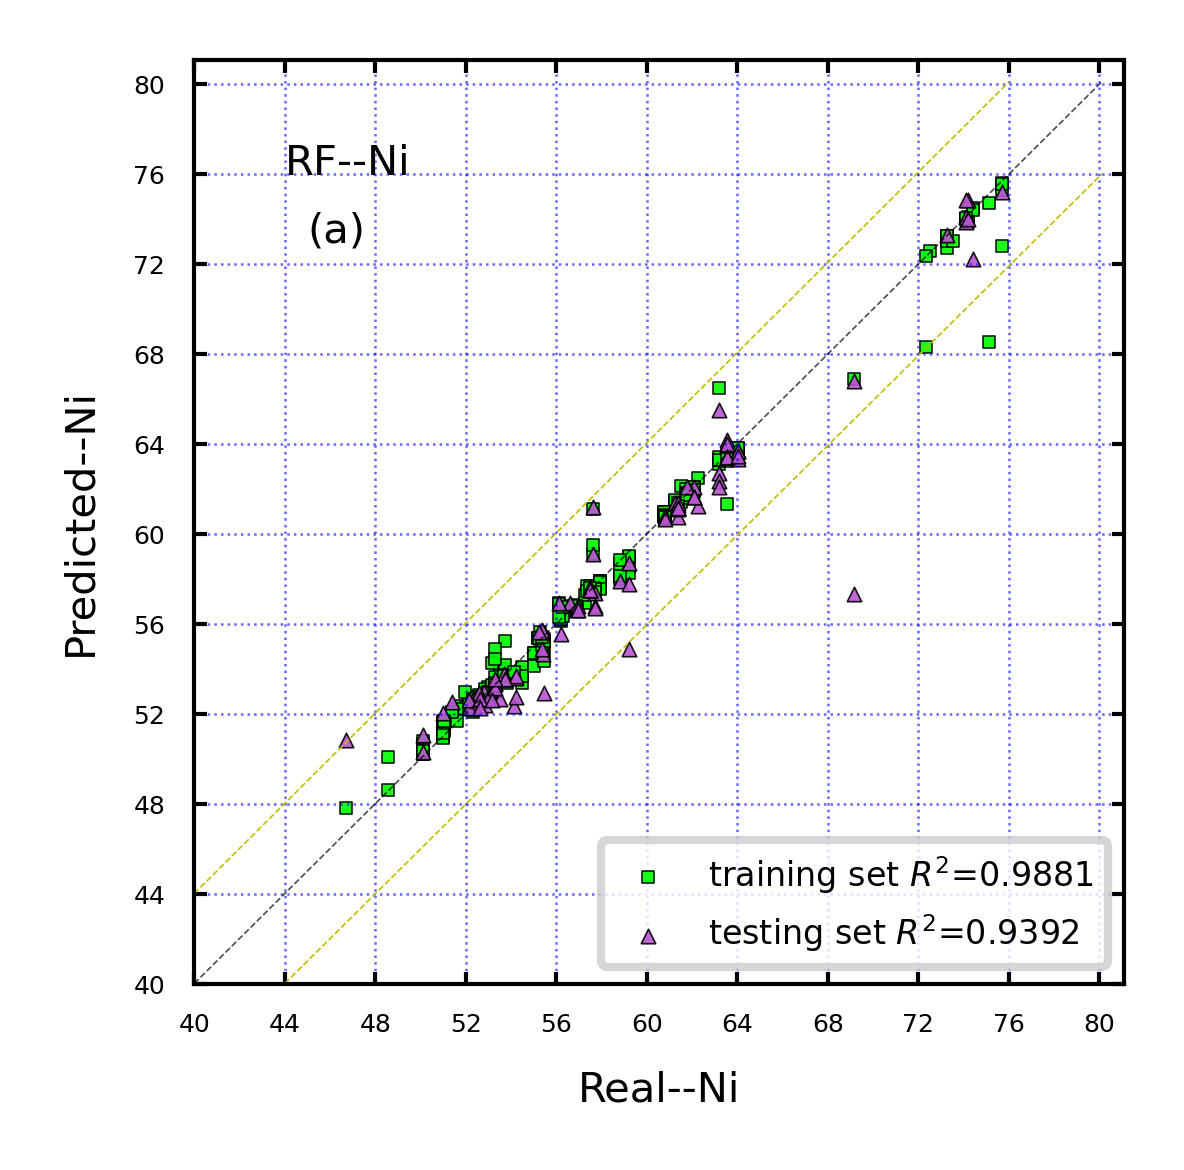

In [29]:
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='b', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(40, 81, 4))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([40, 80.1], [40, 80.1], 'k--', linewidth='0.2', alpha=0.7)
plt.plot([40, 76], [44, 80.1], 'y--', linewidth='0.2', alpha=1.0)
plt.plot([44, 80.1], [40, 76], 'y--', linewidth='0.2', alpha=1.0)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels1, train_predicted_Ni, alpha=0.9, s=2, linewidths=0.2, c='#00ff00',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % model_r1_tr, marker='s')
plt.scatter(test_labels1, test_predicted_Ni, alpha=0.9, s=3, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % model_r1_te, marker='^')

plt.ylim(40,81.1)
plt.xlim(40,81.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
# Display the plot
plt.xlabel('Real--Ni', size=5)
plt.ylabel('Predicted--Ni', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(44,76, 'RF--Ni', fontsize=5)
plt.text(45,73, '(a)', fontsize=5)
plt.show()

# Cr元素

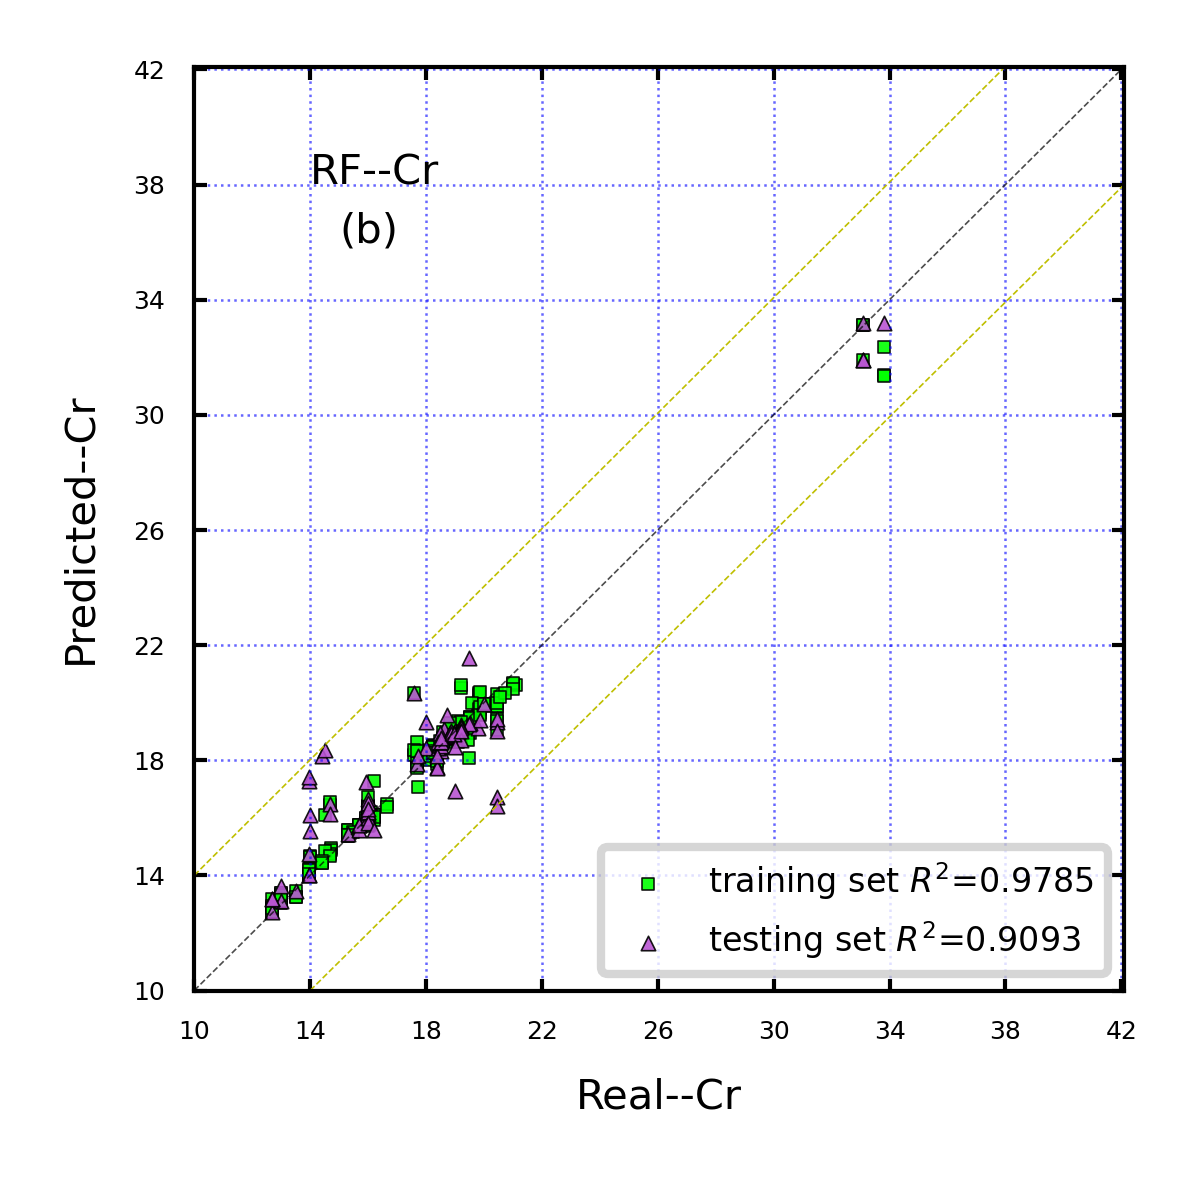

In [36]:
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='b', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(10, 42.1, 4))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([10, 42.1], [10, 42.1], 'k--', linewidth='0.2', alpha=0.7)
plt.plot([10, 38], [14, 42.1], 'y--', linewidth='0.2', alpha=1.0)
plt.plot([14, 42.1], [10, 38], 'y--', linewidth='0.2', alpha=1.0)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels2, train_predicted_Cr, alpha=0.9, s=2, linewidths=0.2, c='#00ff00',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % model_r2_tr, marker='s')
plt.scatter(test_labels2, test_predicted_Cr, alpha=0.9, s=3, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % model_r2_te, marker='^')

plt.ylim(10,42.1)
plt.xlim(10,42.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
# Display the plot
plt.xlabel('Real--Cr', size=5)
plt.ylabel('Predicted--Cr', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(14,38, 'RF--Cr', fontsize=5)
plt.text(15,36, '(b)', fontsize=5)
plt.show()

# Co元素

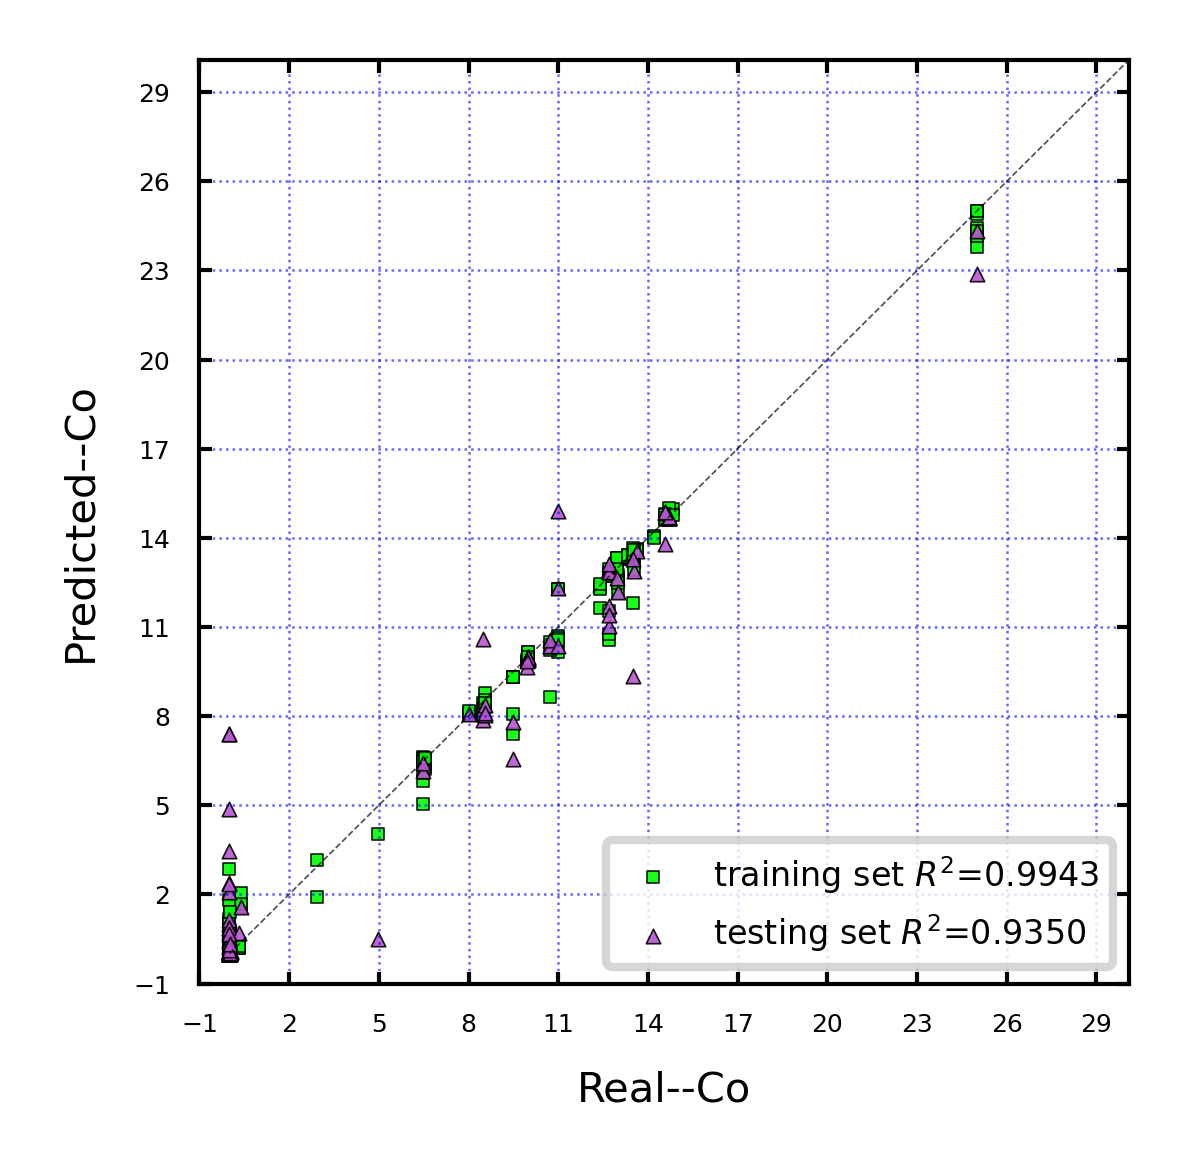

In [38]:
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='b', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(-1, 30.1, 3))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 30.1], [0, 30.1], 'k--', linewidth='0.2', alpha=0.7)
#plt.plot([0, 38], [3, 42.1], 'y--', linewidth='0.2', alpha=1.0)
#plt.plot([14, 42.1], [10, 38], 'y--', linewidth='0.2', alpha=1.0)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels3, train_predicted_Co, alpha=0.9, s=2, linewidths=0.2, c='#00ff00',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % model_r3_tr, marker='s')
plt.scatter(test_labels3, test_predicted_Co, alpha=0.9, s=3, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % model_r3_te, marker='^')

plt.ylim(-1,30.1)
plt.xlim(-1,30.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
# Display the plot
plt.xlabel('Real--Co', size=5)
plt.ylabel('Predicted--Co', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
#plt.text(14,38, 'RF--Co', fontsize=5)
#plt.text(15,36, '(c)', fontsize=5)
plt.show()

# Al元素

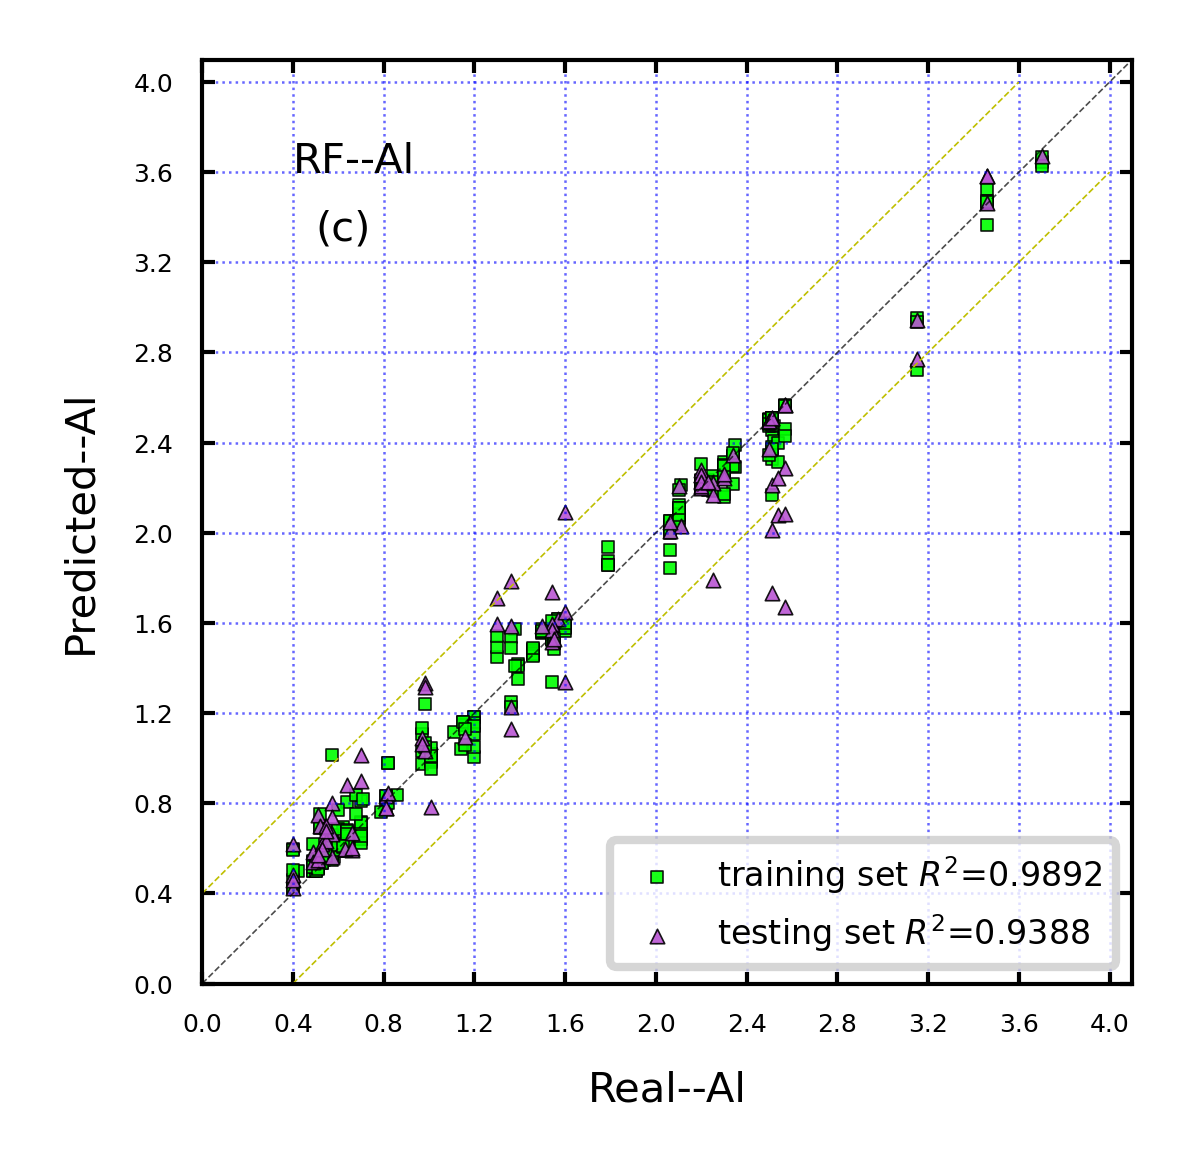

In [48]:
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='b', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 4.1, 0.4))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 4.1], [0, 4.1], 'k--', linewidth='0.2', alpha=0.7)
plt.plot([0, 3.6], [0.4, 4.0], 'y--', linewidth='0.2', alpha=1.0)
plt.plot([0.4, 4.0], [0, 3.6], 'y--', linewidth='0.2', alpha=1.0)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels5, train_predicted_Al, alpha=0.9, s=2, linewidths=0.2, c='#00ff00',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % model_r5_tr, marker='s')
plt.scatter(test_labels5, test_predicted_Al, alpha=0.9, s=3, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % model_r5_te, marker='^')

plt.ylim(0,4.1)
plt.xlim(0,4.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
# Display the plot
plt.xlabel('Real--Al', size=5)
plt.ylabel('Predicted--Al', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(0.4,3.6, 'RF--Al', fontsize=5)
plt.text(0.5,3.3, '(c)', fontsize=5)
plt.show()

# Ti元素

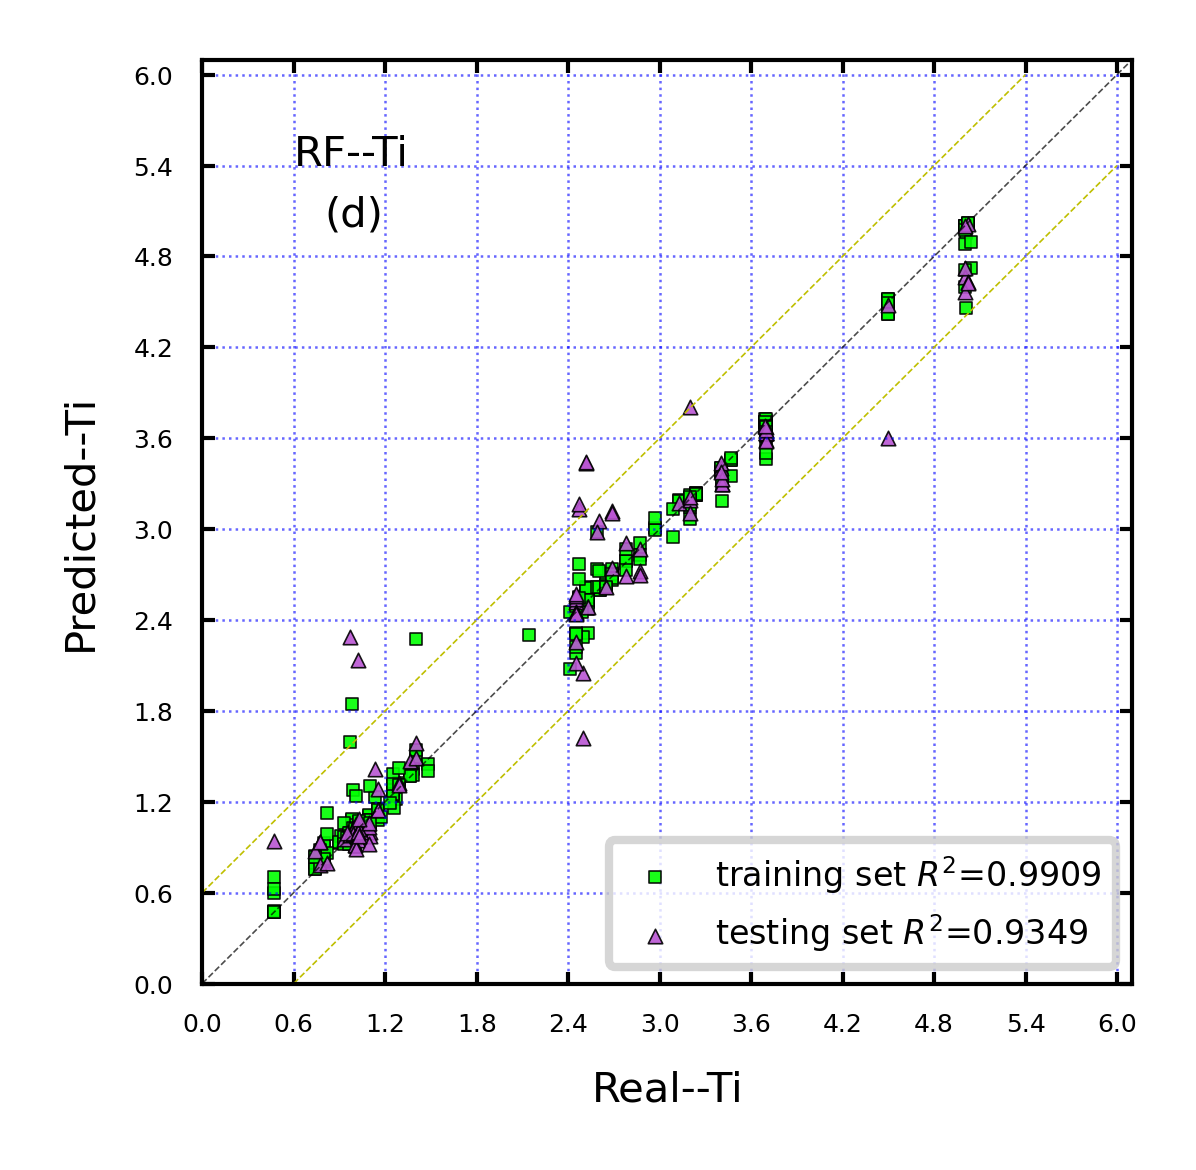

In [50]:
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='b', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 6.1, 0.6))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 6.1], [0, 6.1], 'k--', linewidth='0.2', alpha=0.7)
plt.plot([0, 5.4], [0.6, 6.0], 'y--', linewidth='0.2', alpha=1.0)
plt.plot([0.6, 6.0], [0, 5.4], 'y--', linewidth='0.2', alpha=1.0)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels6, train_predicted_Ti, alpha=0.9, s=2, linewidths=0.2, c='#00ff00',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % model_r6_tr, marker='s')
plt.scatter(test_labels6, test_predicted_Ti, alpha=0.9, s=3, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % model_r6_te, marker='^')

plt.ylim(0,6.1)
plt.xlim(0,6.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
# Display the plot
plt.xlabel('Real--Ti', size=5)
plt.ylabel('Predicted--Ti', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(0.6,5.4, 'RF--Ti', fontsize=5)
plt.text(0.8,5, '(d)', fontsize=5)
plt.show()